In [201]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [202]:
import tensorflow as tf
import numpy as np
import edward as ed
tf.contrib.distributions.kl = tf.contrib.distributions.kl_divergence
from matplotlib import pyplot as plt
%matplotlib inline

In [203]:
from svi_nnmf import *

In [204]:
R_= np.array([[1,2,2,4,5],\
            [5,5,5,2,1],\
            [5,5,5,2,1],\
            [1,2,1,4,5],\
            [2,2,1,4,5],\
            [4,5,5,2,2],\
            [1,2,1,5,5],\
            [5,5,5,2,1],\
            [5,5,5,2,1],\
            [1,2,1,4,5],\
            [2,2,1,4,5],\
            [4,5,5,2,2],\
            [1,2,1,5,5],\
            [5,5,5,2,1],\
            [5,5,5,2,1],\
            [1,2,1,4,5],\
            [2,2,1,4,5],\
            [4,5,5,2,2],\
            [1,2,1,5,5],\
            [5,5,5,2,1],\
            [2,2,1,5,4]])
            

mask_ = np.array([[1,1,1,1,1],\
                  [0,0,0,0,0],\
                  [1,1,1,1,1],\
                  [1,1,1,1,1],\
                  [1,1,1,1,1],\
                  [1,1,1,1,1],\
                  [1,1,1,1,1],\
                  [1,1,1,1,1],\
                  [1,1,1,1,1],\
                  [1,1,1,1,1],\
                  [1,1,1,1,1],\
                  [1,1,1,1,1],\
                  [1,1,1,1,1],\
                  [1,1,1,1,1],\
                  [1,1,1,1,1],\
                  [1,1,1,1,1],\
                  [1,1,1,1,1],\
                  [1,1,1,1,1],\
                  [1,1,1,1,1],\
                  [1,1,1,1,1],\
                  [1,1,1,1,1]])

seen_indices = np.array(np.where(mask_))

# convert everything to tensor
R_ = R_.astype(np.float32)
users = np.expand_dims(seen_indices[0], axis=1)
items = np.expand_dims(seen_indices[1], axis=1)

In [205]:
fake_mask = np.zeros((9,5))
fake_mask[0]+=1
indices = np.array(np.where(fake_mask))
users_0 = np.expand_dims(indices[0], axis=1)
items_0 = np.expand_dims(indices[1], axis=1)

fake_mask = np.zeros((9,5))
fake_mask[2]+=1
indices = np.array(np.where(fake_mask))
users_2 = np.expand_dims(indices[0], axis=1)
items_2 = np.expand_dims(indices[1], axis=1)

In [206]:
masked_indices = np.array(np.where(1-mask_))
users_ = np.expand_dims(masked_indices[0], axis=1)
items_ = np.expand_dims(masked_indices[1], axis=1)

In [207]:
def plot_R(rhats, r=None, title=''):
    _, n_items = rhats.shape
    f, axes = plt.subplots(1, n_items, sharex=True, sharey=True)
    i = 0
    for j in range(n_items):
        if r is not None:
            axes[j].axvline(x=r[j], color='r')
        axes[j].hist(rhats[:,j])
    plt.xlim([-2,7])
    f.suptitle(title)
    plt.show()


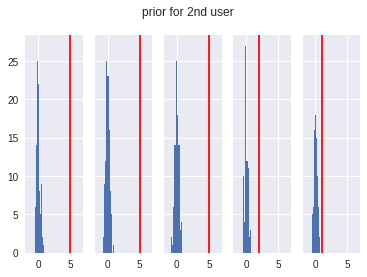

[[ 0.37376413  1.33162057]
 [-1.68611729  0.01795329]
 [ 2.51980996  0.90798616]
 [-0.73399854  0.59599245]
 [-0.43663523  0.71590179]
 [-0.8218447  -0.28460982]
 [ 1.44434047 -1.28017402]
 [-1.64035308 -2.33303952]
 [-0.680022    0.56376773]
 [-0.83000433  0.17098653]
 [-1.10550618 -1.05587649]
 [-0.37927124 -1.54933655]
 [-1.734429   -0.36787122]
 [ 0.53733474 -0.70582628]
 [-0.86095792  0.27721322]
 [ 0.70688677 -0.44903502]
 [ 1.70697892  0.24521741]
 [ 0.87033272  0.32140473]
 [-1.02066302  0.077083  ]
 [ 0.05626037 -0.47851104]
 [ 0.44154587 -0.40486842]]
[[ 0.18385826  0.75241679]
 [-1.1205529   0.12905923]
 [ 0.71374631 -0.84682393]
 [-2.09729791 -0.37401664]
 [-0.12875856 -0.85865462]
 [ 0.75862968  1.01812029]
 [-0.2857368  -0.29302433]
 [ 0.33659643 -0.31651574]
 [ 0.59006429  0.87943846]
 [-1.41427743 -1.17162597]
 [-1.56536603  0.39771965]
 [-0.32271615 -1.10688186]
 [-0.42275923 -0.40702236]
 [-0.49393439  0.80446398]
 [-2.12269115  0.3011879 ]
 [ 0.19647768 -0.47209209]


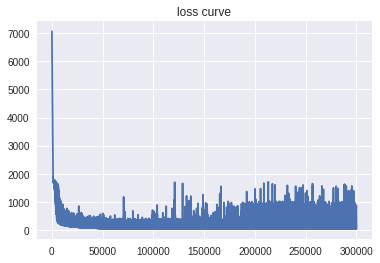

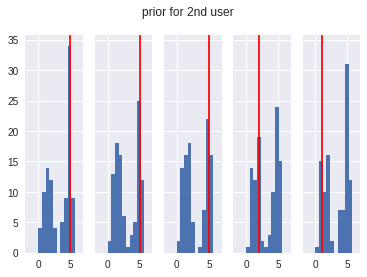

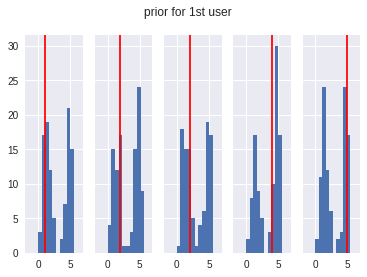

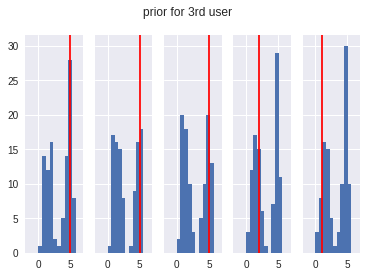

[[  4.12835414e-03  -1.82240590e-01]
 [ -1.81998282e-33   1.18584338e-33]
 [ -5.58726443e-03   4.92403843e-03]
 [  3.53342853e-04  -1.85893327e-01]
 [  1.52347609e-02   8.71851444e-02]
 [ -3.07676475e-03   3.04877330e-02]
 [ -2.64219567e-02   1.03367053e-01]
 [ -7.95016810e-03  -5.33397775e-03]
 [ -2.17800564e-03   3.97219975e-03]
 [ -9.05781693e-04  -1.84363678e-01]
 [  2.19256040e-02   8.34025890e-02]
 [ -5.66225965e-03   3.57961431e-02]
 [ -1.60916243e-02   1.16735406e-01]
 [ -7.08960230e-04   3.79906548e-03]
 [ -1.99125963e-03   1.82425010e-03]
 [  6.86310558e-03  -1.81247249e-01]
 [  1.77779309e-02   7.17265978e-02]
 [  9.80975223e-04   4.09763828e-02]
 [ -1.82400923e-02   1.11352026e-01]
 [  2.06391374e-03  -4.85417695e-04]
 [  1.48143983e-02   5.58265261e-02]]
[[  9.99746037  10.00713062]
 [  9.99995422   9.99995422]
 [ 10.00047398  10.00146294]
 [  9.99925137  10.00342655]
 [  9.99994278  10.00815105]
 [ 10.00343418   9.9981842 ]
 [  9.99714565  10.00173283]
 [ 10.00156403   9.

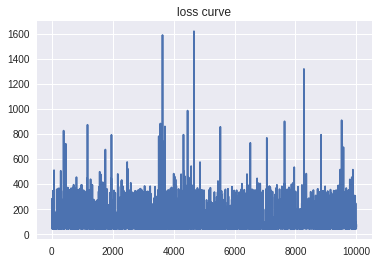

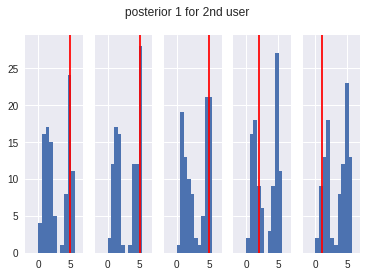

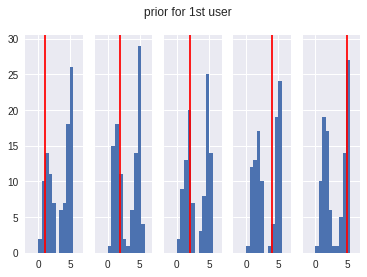

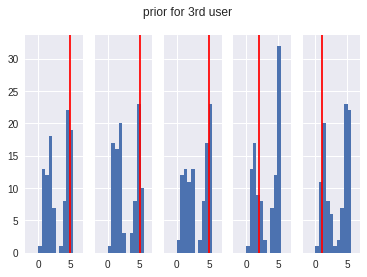

[[  1.21616393e-01  -8.81544277e-02]
 [ -1.81998282e-33   1.18584338e-33]
 [ -6.09677145e-03   2.23646173e-03]
 [  1.24057725e-01  -8.88708979e-02]
 [ -5.57655059e-02   1.67933537e-03]
 [ -9.41548962e-03   5.86459972e-02]
 [ -5.37204519e-02   5.58467545e-02]
 [ -8.34930921e-04   7.65234698e-03]
 [ -4.34291025e-04   5.81859099e-03]
 [  1.24924622e-01  -9.71654132e-02]
 [ -6.07638322e-02   4.35415830e-04]
 [ -4.68594162e-03   7.08589554e-02]
 [ -5.87610453e-02   6.32837787e-02]
 [  3.24910856e-03   4.17624414e-03]
 [ -5.02672931e-03   4.11586324e-03]
 [  1.38761535e-01  -9.89619419e-02]
 [ -5.84738329e-02   2.42459797e-03]
 [  8.57472140e-03   5.77864647e-02]
 [ -7.15926513e-02   6.58969879e-02]
 [ -7.68566085e-03   6.50653383e-03]
 [ -3.44283544e-02  -7.54908938e-03]]
[[ 10.00434494  10.00816441]
 [  9.99995422   9.99995422]
 [ 10.00009823   9.99829769]
 [  9.99900436  10.00319195]
 [  9.99430752   9.99399281]
 [  9.98922348   9.99285889]
 [ 10.00385952  10.00436878]
 [ 10.00019455  10.

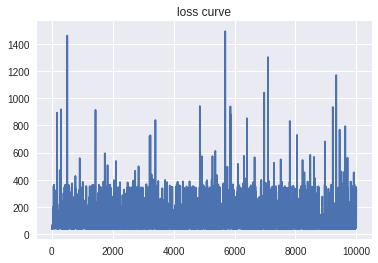

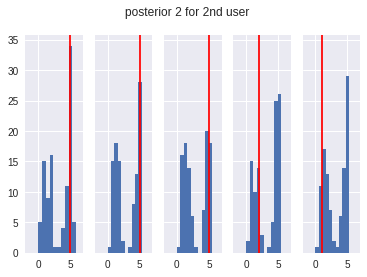

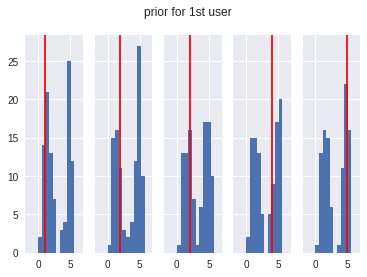

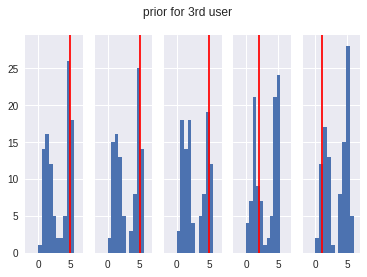

[[  7.68697215e-03   3.14798369e-03]
 [ -1.81998282e-33   1.18584338e-33]
 [  4.24683047e-03   1.11667207e-02]
 [  8.39778408e-03   3.67849809e-03]
 [  2.49700807e-02  -1.73652433e-02]
 [ -5.87615464e-03   4.84039448e-03]
 [  4.95405868e-04   9.64098051e-03]
 [  7.96047912e-04   3.66108795e-03]
 [ -1.66979304e-03   1.41037069e-03]
 [  1.21811526e-02   4.97015938e-03]
 [  1.09651880e-02  -2.25141328e-02]
 [ -8.10388662e-03   1.45815294e-02]
 [  6.12010341e-03   1.19667649e-02]
 [  2.38016481e-03   8.46756995e-03]
 [ -9.19014029e-03   1.07057998e-03]
 [  9.23043955e-03   1.17870495e-02]
 [  1.34328883e-02  -1.85030717e-02]
 [ -8.78983177e-03   1.13920895e-02]
 [  8.74682888e-03   1.62399318e-02]
 [ -2.69832485e-03   5.70475357e-03]
 [  1.24189574e-02  -3.01523115e-02]]
[[ 10.006073    10.00012207]
 [  9.99995422   9.99995422]
 [ 10.00169659  10.00256252]
 [  9.99393272  10.0012989 ]
 [  9.99889469   9.99598217]
 [ 10.0019722    9.99981403]
 [ 10.00844955   9.99750042]
 [  9.99796581  10.

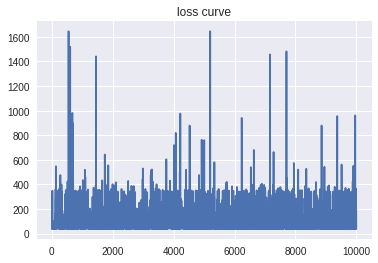

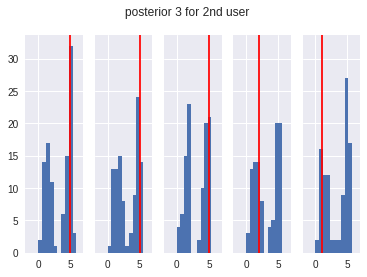

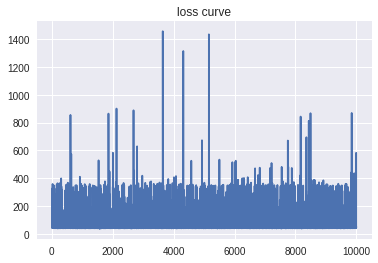

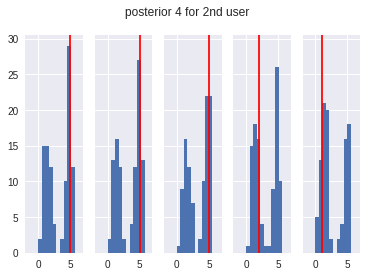

In [208]:
graph = SVI_NNMF(21, 5)
#graph.inference.initialize(optimizer=tf.train.RMSPropOptimizer(0.005))
graph.inference.initialize(optimizer=tf.train.RMSPropOptimizer(0.0005))
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    samples = np.zeros(5)
    for i in range(100):
        sample = sess.run(graph.R_hats_samples, feed_dict={graph.user_indices: users_, graph.item_indices: items_})
        samples = np.vstack((samples, sample))
    plot_R(samples, R_[1,:], title='prior for 2nd user')
    
    
    print(sess.run(graph.qU_mu))
    print(sess.run(graph.qU_var))
    print(sess.run(graph.qV_mu))
    print(sess.run(graph.qV_var))
    print(sess.run(graph.qU_prime_mu))
    print(sess.run(graph.qU_prime_var))
    print(sess.run(graph.qV_prime_mu))
    print(sess.run(graph.qV_prime_var))
    
    losses = train(graph, users, items, R_, sess)
    plt.plot(losses)
    plt.title('loss curve')
    plt.show()
    samples = np.zeros(5)
    for i in range(100):
        sample = sess.run(graph.R_hats_samples, feed_dict={graph.user_indices: users_, graph.item_indices: items_})
        samples = np.vstack((samples, sample))
    
    plot_R(samples, R_[1,:], title='prior for 2nd user')
    
    samples = np.zeros(5)
    for i in range(100):
        sample = sess.run(graph.R_hats_samples, feed_dict={graph.user_indices: users_0, graph.item_indices: items_0})
        samples = np.vstack((samples, sample))
    plot_R(samples, R_[0,:], title='prior for 1st user')
    
    samples = np.zeros(5)
    for i in range(100):
        sample = sess.run(graph.R_hats_samples, feed_dict={graph.user_indices: users_2, graph.item_indices: items_2})
        samples = np.vstack((samples, sample))
    plot_R(samples, R_[2,:], title='prior for 3rd user')
        
    print(sess.run(graph.qU_mu))
    print(sess.run(graph.qU_var))
    print(sess.run(graph.qV_mu))
    print(sess.run(graph.qV_var))
    print(sess.run(graph.qU_prime_mu))
    print(sess.run(graph.qU_prime_var))
    print(sess.run(graph.qV_prime_mu))
    print(sess.run(graph.qV_prime_var))
    
    mask_ = np.array([[1,1,1,1,1],\
                      [0,0,1,0,0],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1]])
    
    users = np.expand_dims(seen_indices[0], axis=1)
    items = np.expand_dims(seen_indices[1], axis=1)
    
    losses = train(graph, users, items, R_, sess, 10000)
    plt.plot(losses)
    plt.title('loss curve')
    plt.show()
    samples = np.zeros(5)
    for i in range(100):
        sample = sess.run(graph.R_hats_samples, feed_dict={graph.user_indices: users_, graph.item_indices: items_})
        samples = np.vstack((samples, sample))
    plot_R(samples, R_[1,:], title='posterior 1 for 2nd user')
    
        
    samples = np.zeros(5)
    for i in range(100):
        sample = sess.run(graph.R_hats_samples, feed_dict={graph.user_indices: users_0, graph.item_indices: items_0})
        samples = np.vstack((samples, sample))
    plot_R(samples, R_[0,:], title='prior for 1st user')
    
    samples = np.zeros(5)
    for i in range(100):
        sample = sess.run(graph.R_hats_samples, feed_dict={graph.user_indices: users_2, graph.item_indices: items_2})
        samples = np.vstack((samples, sample))
    plot_R(samples, R_[2,:], title='prior for 3rd user')
    
    print(sess.run(graph.qU_mu))
    print(sess.run(graph.qU_var))
    print(sess.run(graph.qV_mu))
    print(sess.run(graph.qV_var))
    print(sess.run(graph.qU_prime_mu))
    print(sess.run(graph.qU_prime_var))
    print(sess.run(graph.qV_prime_mu))
    print(sess.run(graph.qV_prime_var))
    
    mask_ = np.array([[1,1,1,1,1],\
                      [0,0,1,0,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1]])
    
    users = np.expand_dims(seen_indices[0], axis=1)
    items = np.expand_dims(seen_indices[1], axis=1)
    
    losses = train(graph, users, items, R_, sess, 10000)
    plt.plot(losses)
    plt.title('loss curve')
    plt.show()
    samples = np.zeros(5)
    for i in range(100):
        sample = sess.run(graph.R_hats_samples, feed_dict={graph.user_indices: users_, graph.item_indices: items_})
        samples = np.vstack((samples, sample))
    plot_R(samples, R_[1,:], title='posterior 2 for 2nd user')
    
    samples = np.zeros(5)
    for i in range(100):
        sample = sess.run(graph.R_hats_samples, feed_dict={graph.user_indices: users_0, graph.item_indices: items_0})
        samples = np.vstack((samples, sample))
    plot_R(samples, R_[0,:], title='prior for 1st user')
    
    samples = np.zeros(5)
    for i in range(100):
        sample = sess.run(graph.R_hats_samples, feed_dict={graph.user_indices: users_2, graph.item_indices: items_2})
        samples = np.vstack((samples, sample))
    plot_R(samples, R_[2,:], title='prior for 3rd user')
    
    print(sess.run(graph.qU_mu))
    print(sess.run(graph.qU_var))
    print(sess.run(graph.qV_mu))
    print(sess.run(graph.qV_var))
    print(sess.run(graph.qU_prime_mu))
    print(sess.run(graph.qU_prime_var))
    print(sess.run(graph.qV_prime_mu))
    print(sess.run(graph.qV_prime_var))
    
    mask_ = np.array([[1,1,1,1,1],\
                      [1,0,1,0,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1]])
    
    users = np.expand_dims(seen_indices[0], axis=1)
    items = np.expand_dims(seen_indices[1], axis=1)
    
    losses = train(graph, users, items, R_, sess, 10000)
    plt.plot(losses)
    plt.title('loss curve')
    plt.show()
    samples = np.zeros(5)
    for i in range(100):
        sample = sess.run(graph.R_hats_samples, feed_dict={graph.user_indices: users_, graph.item_indices: items_})
        samples = np.vstack((samples, sample))
    plot_R(samples, R_[1,:], title='posterior 3 for 2nd user')
    
    mask_ = np.array([[1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1]])
    
    users = np.expand_dims(seen_indices[0], axis=1)
    items = np.expand_dims(seen_indices[1], axis=1)
    
    losses = train(graph, users, items, R_, sess, 10000)
    plt.plot(losses)
    plt.title('loss curve')
    plt.show()
    samples = np.zeros(5)
    for i in range(100):
        sample = sess.run(graph.R_hats_samples, feed_dict={graph.user_indices: users_, graph.item_indices: items_})
        samples = np.vstack((samples, sample))
    plot_R(samples, R_[1,:], title='posterior 4 for 2nd user')
    
    